In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data = pd.read_csv('Data/heart-disease.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


There are different performance metrics used in the ML
1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

### Accuracy

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_data.drop("target", axis = 1)
y = heart_data.target

clf = RandomForestClassifier()

cross_values = cross_val_score(clf, X, y, cv = 5)

In [5]:
np.mean(cross_values)

0.8281967213114754

In [6]:
print(f"Accuracy of the classifier based on the cross value score is {np.mean(cross_values) * 100:.2f}%")

Accuracy of the classifier based on the cross value score is 82.82%


### Area under curve

**It is also called as area under the reciever operating characteristics curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curve is comparison of model's true positive rate to false positive rate

1. True Positive : Predicted 1 when truth is 1
2. False Positive : Predicted 1 when truth is 0
3. True Negative : Predicted 0 when truth is 0
4. False Negative : Predicted 0 when truth is 1

In [22]:
# lets just get the probability of predicted values in the clf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_proba = clf.predict_proba(X_test)

In [23]:
y_proba[0:10]

array([[0.34, 0.66],
       [0.31, 0.69],
       [0.95, 0.05],
       [0.67, 0.33],
       [0.45, 0.55],
       [0.6 , 0.4 ],
       [0.37, 0.63],
       [0.16, 0.84],
       [0.53, 0.47],
       [0.44, 0.56]])

In [24]:
# Get the positive values in the y_proba which are in the second column of every row

positive_val = y_proba[:, 1]

In [25]:
positive_val[:10]

array([0.66, 0.69, 0.05, 0.33, 0.55, 0.4 , 0.63, 0.84, 0.47, 0.56])

In [26]:
from sklearn.metrics import roc_curve

fpr, tpr, threshhold = roc_curve(y_test, positive_val)

In [27]:
fpr

array([0.        , 0.03846154, 0.03846154, 0.03846154, 0.07692308,
       0.11538462, 0.11538462, 0.11538462, 0.11538462, 0.11538462,
       0.11538462, 0.19230769, 0.19230769, 0.23076923, 0.23076923,
       0.30769231, 0.34615385, 0.34615385, 0.57692308, 0.65384615,
       0.80769231, 0.84615385, 0.92307692, 1.        ])

Now lets visualize the ROC curve so that we can get the idea of how the curve goes and what does it look and mean area under curve

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    plt.xlabel("False Positive Rate(FPR)")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")

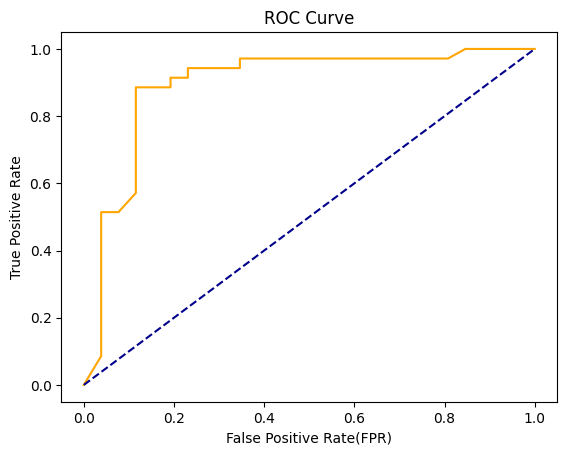

In [29]:
plot_roc_curve(fpr, tpr)

In [30]:
# we can get the AUC score that is area under curve score 
# It ranges from lowest value of 0 to highest of 1

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, positive_val)

0.8945054945054945

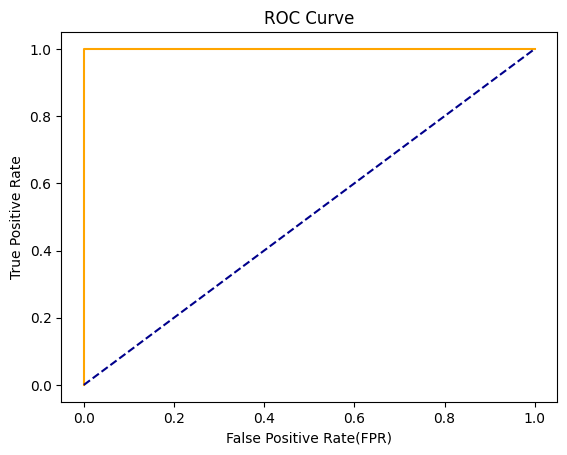

In [35]:
# we can see the parfect model where tp and fp values have curve with area 1

fpr, tpr, threshold = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [38]:
roc_auc_score(y_test, y_test)

1.0

### Confusion Matrix

Confusion matrix is used to compare the predicted values of the model with the actual values that are there
1. It can be used for the binary clasication
2. It can also be used for the multiclass classification and hence that will have more number of columns and rows

In [41]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

In [42]:
matrix

array([[21,  5],
       [ 4, 31]], dtype=int64)

1. Here rows have actual values 
2. Columns have predicted values

In [43]:
pd.crosstab(y_test, 
           y_pred,
           rownames=["actual values"], 
           colnames=["predicted values"])

predicted values,0,1
actual values,,
0,21,5
1,4,31


In [44]:
# we can visualize the confusion matrix using  seaborn

<function seaborn.widgets.choose_dark_palette(input='husl', as_cmap=False)>

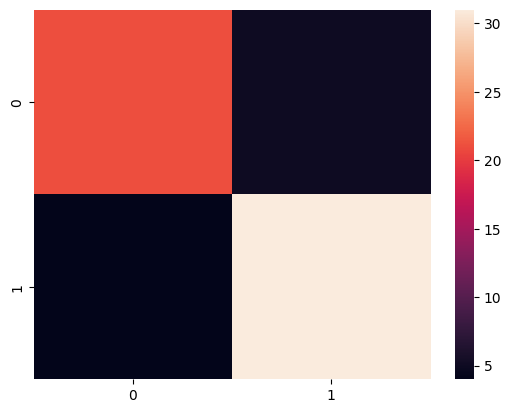

In [47]:
import seaborn as sns

y_pred = clf.predict(X_test)

matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix)


**Now in the scikitlearn latest version we have got the feature to visualize the matrix**
1. It can be done by using classifier direclty
2. It can also be done by using predicted values

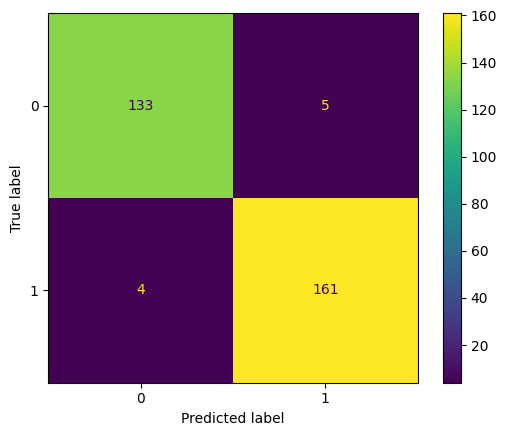

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(clf, X, y)
# It uses whole estimator

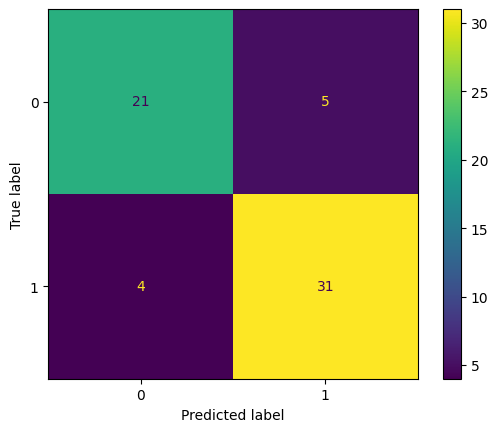

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# It uses the actual test values and also predicted values there